In [1]:
#IMPORTS
# import pandas as pd
import os
import matplotlib.pyplot as plt
from LoadModels.CategoricalNets import categorical1, categorical2,categorical3
from LoadModels.KNNbase import knn_baseline
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Using TensorFlow backend.


In [2]:
PATH =  r'DIRECTORY OF THE DATASET'

In [5]:
image_shape =(100,100,3)
categories = 8
convnet = categorical3(image_shape,categories)
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 56, 56, 32)        2432      
_________________________________________________________________
activation_6 (Activation)    (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        51264     
_________________________________________________________________
activation_7 (Activation)    (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 128)       204928    
_________________________________________________________________
activation_8 (Activation)    (None, 48, 48, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)      

In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    fill_mode='nearest',
    data_format=None, validation_split=.3, dtype=None
)

# Create the 2 datasets with the Keras generator
train_it = datagen.flow_from_directory(PATH, class_mode='categorical',target_size=(100,100),batch_size=4,subset='training')
val_it = datagen.flow_from_directory(PATH, class_mode='categorical',target_size=(100,100), batch_size=4,subset='validation')


Found 1837 images belonging to 8 classes.
Found 781 images belonging to 8 classes.


In [7]:
#Check if everything works properly
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(4, 60, 60, 3), min=0.000, max=255.000


### Run the model

In [8]:
conv= convnet.fit_generator(train_it, steps_per_epoch=35, validation_data=val_it, validation_steps=20,epochs=100)

Epoch 1/100
35/35 [==============================] - 5s 137ms/step - loss: 7.1080 - accuracy: 0.1357 - val_loss: 3.7667 - val_accuracy: 0.0625
Epoch 2/100
35/35 [==============================] - 3s 90ms/step - loss: 4.3886 - accuracy: 0.0857 - val_loss: 3.5521 - val_accuracy: 0.2000
Epoch 3/100
35/35 [==============================] - 3s 96ms/step - loss: 3.4617 - accuracy: 0.1714 - val_loss: 3.8596 - val_accuracy: 0.1000
Epoch 4/100
35/35 [==============================] - 3s 99ms/step - loss: 3.0881 - accuracy: 0.0714 - val_loss: 2.2691 - val_accuracy: 0.1000
Epoch 5/100
35/35 [==============================] - 4s 109ms/step - loss: 2.2544 - accuracy: 0.1214 - val_loss: 2.0646 - val_accuracy: 0.1625
Epoch 6/100
35/35 [==============================] - 4s 106ms/step - loss: 2.2619 - accuracy: 0.0929 - val_loss: 2.0880 - val_accuracy: 0.0875
Epoch 7/100
35/35 [==============================] - 4s 104ms/step - loss: 2.2908 - accuracy: 0.0803 - val_loss: 2.2403 - val_accuracy: 0.0625
Ep

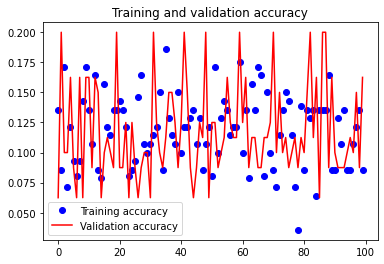

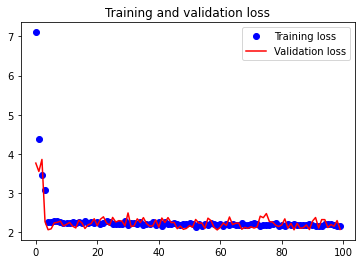

In [9]:
# Plot accuracy and loss

### PLot of loss and accuracy
acc = conv.history['accuracy']
val_acc = conv.history['val_accuracy']
loss = conv.history['loss']
val_loss = conv.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

_____________________________________________________________

## Test the model

In [20]:
TEST_PATH = r'TEST DIRECTORY'

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    fill_mode='nearest',
    data_format=None, dtype=None
)



# Create the 2 datasets with the Keras generator
test_it = datagen.flow_from_directory(TEST_PATH, class_mode='categorical',target_size=(100,100),batch_size=64)


# filenames = test_generator.filenames
nb_samples = len(test_it)

predict = convnet.predict_generator(test_it,steps = nb_samples)

# convnet.predict_generator(test_it, steps_per_epoch=35, validation_data=val_it, validation_steps=20,epochs=100)

Found 272 images belonging to 55 classes.


__________________________________

## Naive Classifier

## KNN CLASSIFIER

### We must load the data again

In [ ]:
def counter(data,location):
    
    '''Creates a dataframe with the location and
    the category + sub-category information'''
    
    df = pd.DataFrame(data)
    df.columns = ['Path']
    df['Category'] = df['Sub-Category'] = ''

    ## Split in categories and sub-categories
    for i in range(len(df)):

        tmp_categories = df['Path'][i].split(location)[1].split("\\")[1:3]
        df['Category'].iat[i] = tmp_categories[0]
        df['Sub-Category'].iat[i] = tmp_categories[1]
    
    return df


def DataLoad(location): #, size
    
    # find the size of our dataset
    data = glob.glob(location+'\\***\\**\\*.png')
    
    # create the dataframe with the categories and shuffle the data
    info = counter(data,location)
#     info = shuffle(info)
    
    # define the size of train and test 
#     x_size = int(len(info) * (1 - split_size))
#     y_size = 1 - x_size
    
    # Encode the Labels of the dataset
    le = preprocessing.LabelEncoder()
    
    info['Label'] = le.fit_transform(list(info['Sub-Category'])) 
#     print(info['Label'],info['Sub-Category'])
    ## Labels to array
    labels = np.array(info['Label'])
    
    images = []
    # Append the images to X
    for i in info['Path']:
        image = cv2.imread(i)
        images.append(image)
    # Change the list to numpy array
    images = np.asarray(images) 
    
    return images, labels, info

In [ ]:
x, y ,dataset= DataLoad(PATH)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

##### Run KNN
- This takes a while

In [ ]:
knn_baseline(x_train, y_train, x_test, y_test)